# aSPEM Experiment : analysis




In [1]:
import glob
import pickle
import matplotlib.pyplot as plt
from cycler import cycler
import numpy as np
import scipy as sc
from scipy import stats

In [2]:
!ls data/

enregistrement_baptiste_2017-07-19_113257.asc
enregistrement_baptiste_2017-07-19_113257.pkl
enregistrement_baptiste_2017-07-19_114608.asc
enregistrement_baptiste_2017-07-19_114608.pkl
lala_psychophysique_chloe_2017-06-27_095209.pkl
psychophysique__2017-07-13_144836.pkl
psychophysique__2017-07-17_145909.pkl
psychophysique_anna_2017-06-27_122211.pkl
psychophysique_baptiste_2017-06-22_151919.pkl
psychophysique_baptiste_2017-06-22_153118.pkl
psychophysique_baptiste_2017-06-27_132220.pkl
psychophysique_baptiste_2017-07-19_155901.pkl
psychophysique_chloe_2017-06-21_162644.pkl
psychophysique_chloe_2017-06-22_112137.pkl
psychophysique_chloe_2017-06-28_160627.pkl
psychophysique_chloe_2017-06-29_092310.pkl
psychophysique_laurent_2017-06-22_141053.pkl
psychophysique_laurent_2017-06-22_144451.pkl
psychophysique_victor1_2017-07-19_150851.pkl


In [3]:
%load_ext autoreload
%autoreload 2
from __future__ import division, print_function, absolute_import

%matplotlib inline
fig_width = 12

from aSPEM import aSPEM

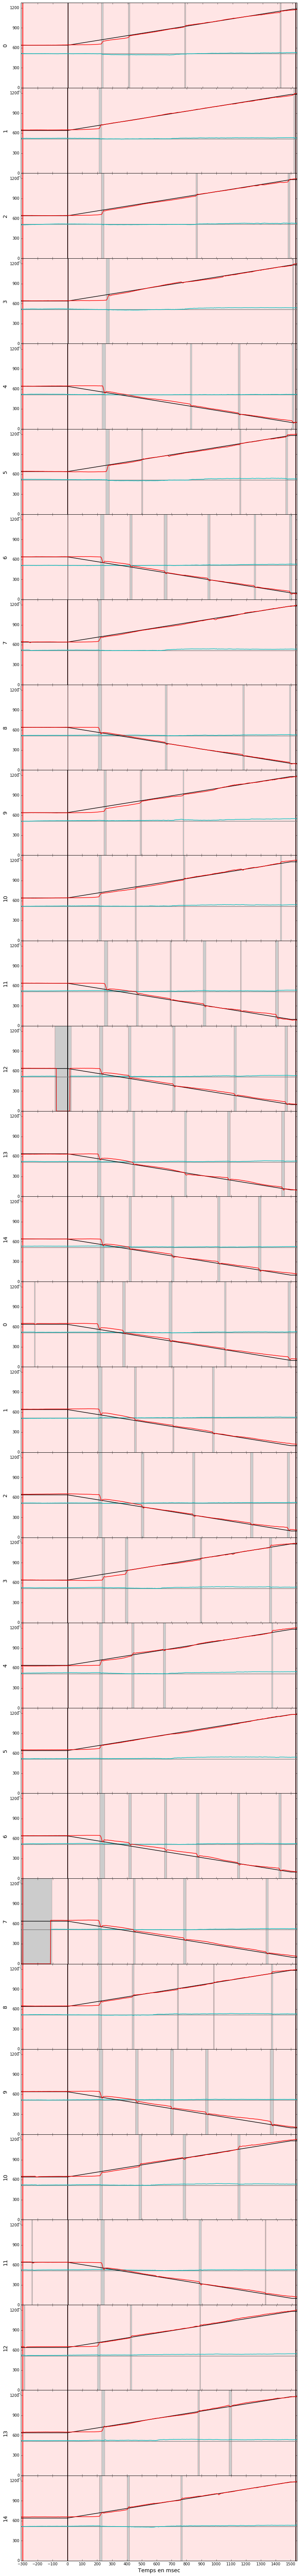

In [4]:
timeStr = '2017-07-19_114608'
observer = 'baptiste'

mode = 'enregistrement'
e = aSPEM(mode, timeStr, observer)

fig, axs = e.plot_enregistrement()

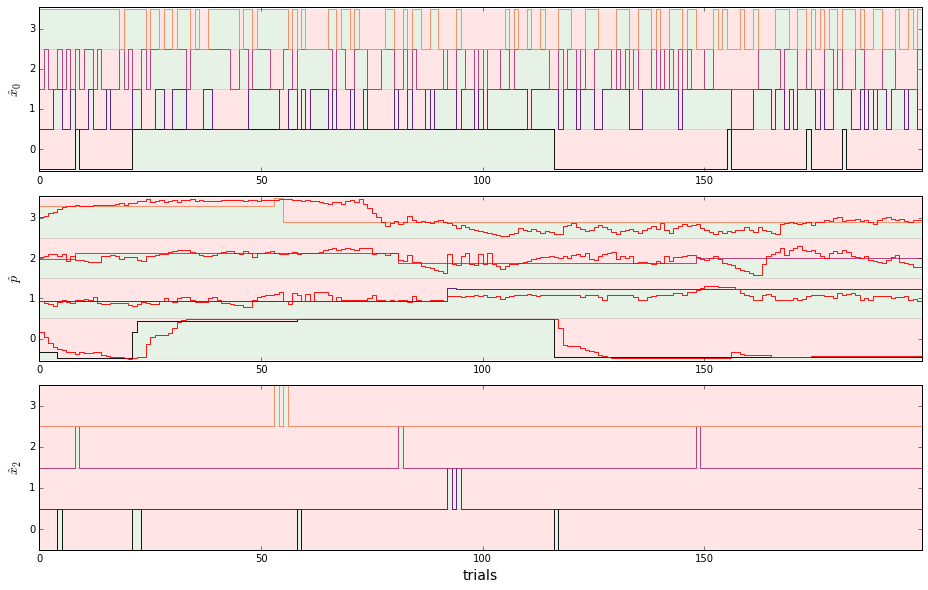

In [5]:
timeStr = '2017-06-27_122211'
observer = 'anna'

mode = 'psychophysique'
e = aSPEM(mode, timeStr, observer)

fig, axs = e.plot(mode=mode)

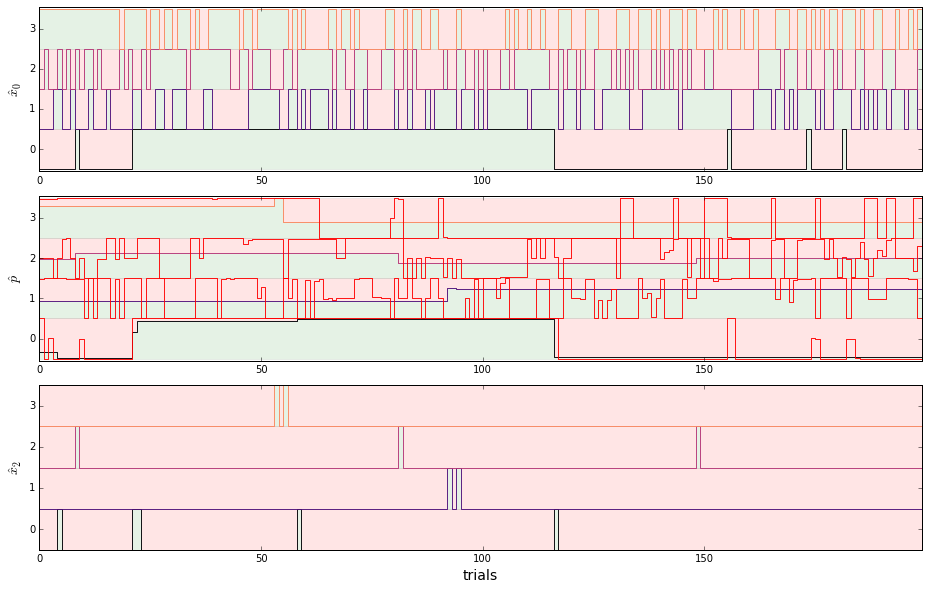

In [6]:
timeStr = '2017-06-27_132220'
observer = 'baptiste'

mode = 'psychophysique'
e = aSPEM(mode, timeStr, observer)

fig, axs = e.plot(mode=mode)


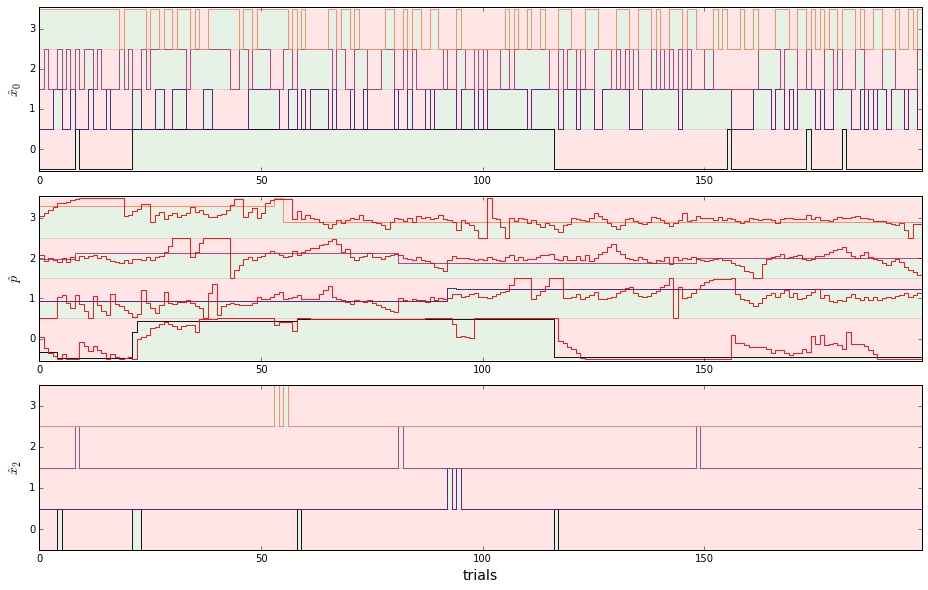

In [7]:
timeStr = '2017-07-19_150851'
observer = 'victor1'

mode = 'psychophysique'
e = aSPEM(mode, timeStr, observer)

fig, axs = e.plot(mode=mode)

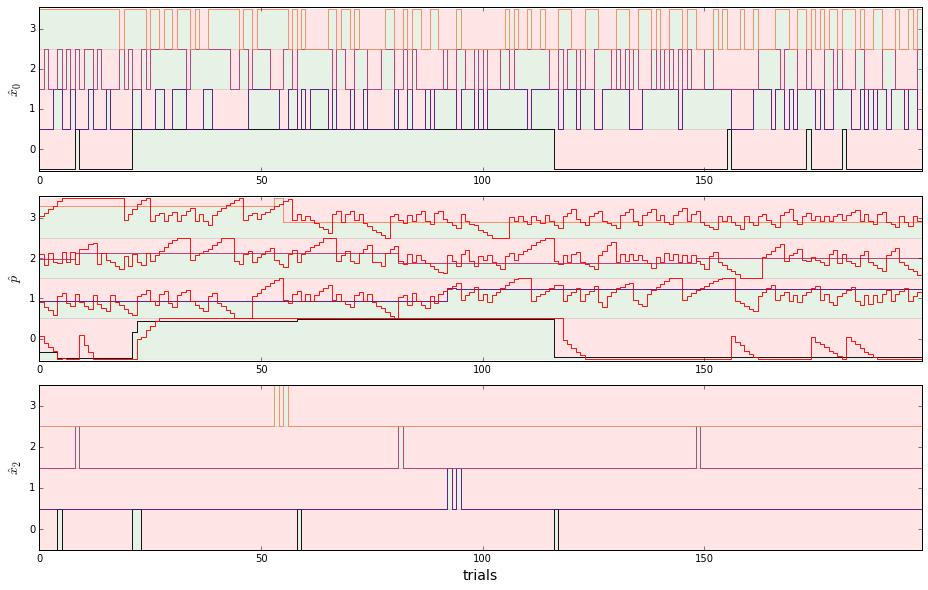

In [8]:
timeStr = '2017-07-19_155901'
observer = 'baptiste'

mode = 'psychophysique'
e = aSPEM(mode, timeStr, observer)

fig, axs = e.plot(mode=mode)

In [9]:
liste = []
for fname in glob.glob('data/*pkl'):
    a = fname.split('/')[1].split('.')[0].split('_')
    liste.append(a)
    print(a)

['psychophysique', 'chloe', '2017-06-29', '092310']
['lala', 'psychophysique', 'chloe', '2017-06-27', '095209']
['psychophysique', 'chloe', '2017-06-22', '112137']
['psychophysique', 'chloe', '2017-06-28', '160627']
['psychophysique', 'baptiste', '2017-06-27', '132220']
['psychophysique', 'baptiste', '2017-06-22', '151919']
['psychophysique', 'baptiste', '2017-07-19', '155901']
['psychophysique', 'baptiste', '2017-06-22', '153118']
['enregistrement', 'baptiste', '2017-07-19', '113257']
['psychophysique', '', '2017-07-17', '145909']
['enregistrement', 'baptiste', '2017-07-19', '114608']
['psychophysique', 'victor1', '2017-07-19', '150851']
['psychophysique', 'anna', '2017-06-27', '122211']
['psychophysique', 'chloe', '2017-06-21', '162644']
['psychophysique', '', '2017-07-13', '144836']
['psychophysique', 'laurent', '2017-06-22', '144451']
['psychophysique', 'laurent', '2017-06-22', '141053']


In [10]:
exp = []
for x in range(len(liste)) :
    if liste[x][0]=='psychophysique' and liste[x][1] in ['anna','baptiste', 'chloe', 'victor1'] and liste[x][2] in ['2017-06-27', '2017-06-28', '2017-06-29', '2017-07-19'] :
        a = 'data/%s_%s_%s_%s.pkl'%(liste[x][0], liste[x][1],liste[x][2],liste[x][3])
        with open(a, 'rb') as fichier :
            b = pickle.load(fichier, encoding='latin1')
            b['observer'] = liste[x][1] # a suprimer pour les prochains fichiers
            b['date'] = liste[x][2] # a suprimer pour les prochains fichiers
            exp.append(b)


 chloe 2017-06-29 = black
block 1 = (0.94314883938979766, 1.1468443783755058e-96)
block 2 = (0.78725995379420421, 1.9023005990772773e-43)
block 3 = (0.36444408912572196, 1.1248299590209743e-07)
block 4 = (0.82345148328747297, 1.2719393697704541e-50)

 chloe 2017-06-28 = red
block 1 = (0.93111786735513047, 1.1254941418205713e-88)
block 2 = (0.80576544615992618, 6.3020287135111159e-47)
block 3 = (0.41587437874895272, 9.1165859580452567e-10)
block 4 = (0.81494090250018947, 8.5499087145874143e-49)

 baptiste 2017-06-27 = cyan
block 1 = (0.94094693924240158, 4.4214505528374847e-95)
block 2 = (-0.017675949940122945, 0.80380309143466566)
block 3 = (0.22072947218262801, 0.0016845758015813922)
block 4 = (0.71828684514256158, 5.0132968607641453e-33)

 baptiste 2017-07-19 = magenta
block 1 = (0.93646568253248785, 4.9324459355090587e-92)
block 2 = (0.44084021380837862, 6.4449514542628464e-11)
block 3 = (0.24419101714922029, 0.00049280177074118893)
block 4 = (0.56418538378220651, 3.330545184199281

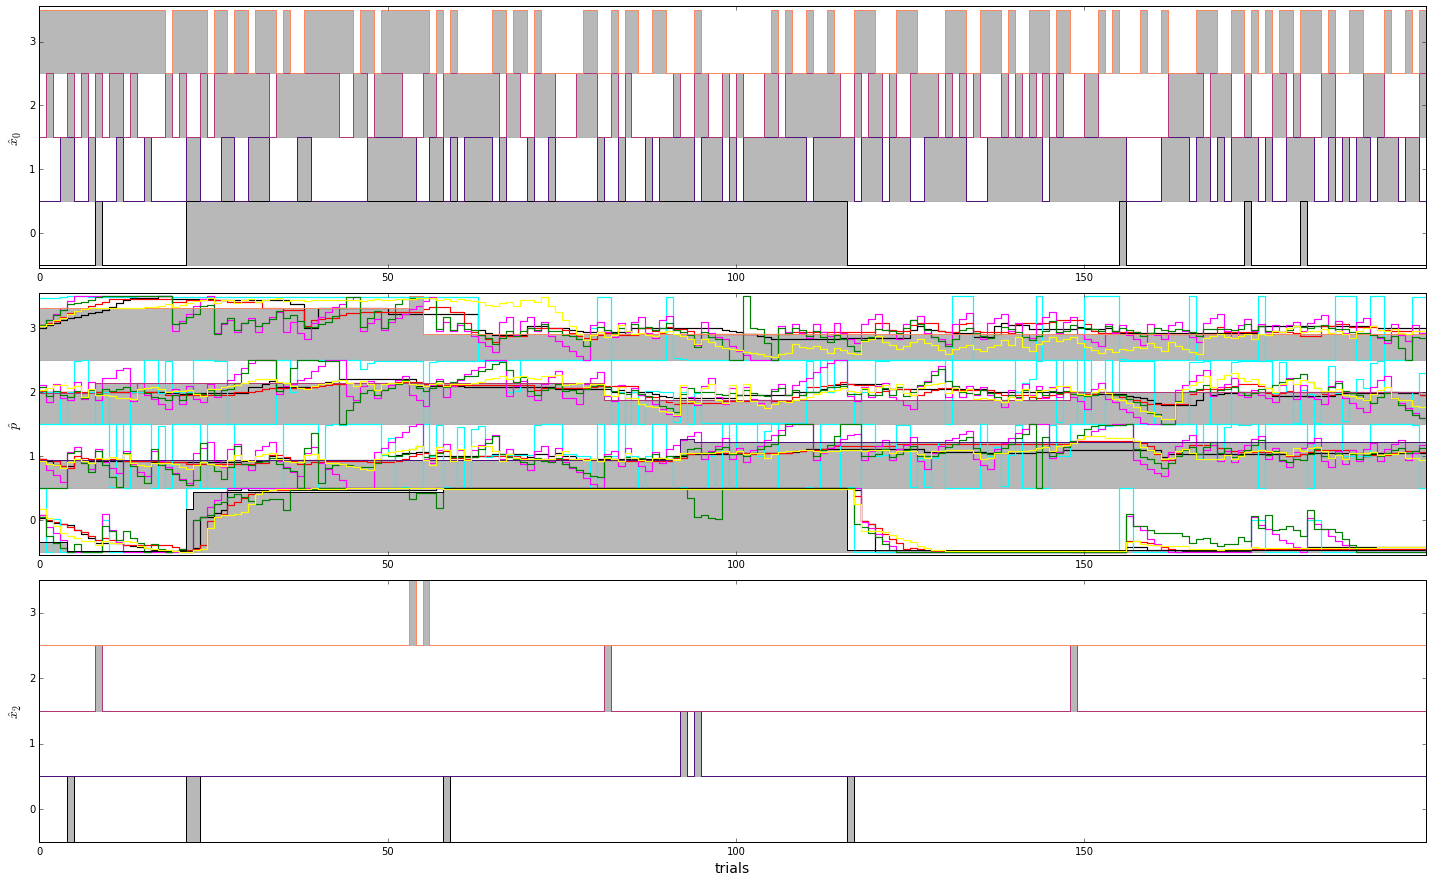

In [11]:
fig_width = 20
fig, axs = plt.subplots(3, 1, figsize=(fig_width, fig_width/(1.6180)))

for x, color in enumerate(['black', 'red', 'cyan', 'magenta', 'green', 'yellow']):
    N_trials = exp[x]['N_trials']
    N_blocks = exp[x]['N_blocks']
    p = exp[x]['p']
    stick = np.zeros_like(p)
    stick[:, :, 0] = np.ones((N_trials, 1)) * np.arange(N_blocks)[np.newaxis, :]
    stick[:, :, 1] = np.ones((N_trials, 1)) * np.arange(N_blocks)[np.newaxis, :]
    stick[:, :, 2] = np.ones((N_trials, 1)) * np.arange(N_blocks)[np.newaxis, :]
    corrects = 0

    for i_layer, label in enumerate([r'$\^x_0$', r'$\^p$', r'$\^x_2$']):
        axs[i_layer].set_prop_cycle(cycler('color', [plt.cm.magma(h) for h in np.linspace(0, 1, N_blocks+1)]))
        _ = axs[i_layer].step(range(N_trials), p[:, :, i_layer]+stick[:, :, i_layer], lw=1, alpha=.9)
        for i_block in range(N_blocks):
            _ = axs[i_layer].fill_between(range(N_trials), i_block + np.zeros_like(p[:, i_block, i_layer]), i_block + p[:, i_block, i_layer], lw=.5, alpha=.05, facecolor='black', step='pre')
            #_ = axs[i_layer].fill_between(range(N_trials), i_block + np.ones_like(p[:, i_block, i_layer]), i_block + p[:, i_block, i_layer], lw=.5, alpha=.1, facecolor='red', step='pre')
        axs[i_layer].axis('tight')
        axs[i_layer].set_yticks(np.arange(N_blocks)+.5)
        axs[i_layer].set_yticklabels(np.arange(N_blocks) )
        axs[i_layer].set_ylabel(label, fontsize=14)
        
    results = (exp[x]['results']+1)/2 # results est sur [-1,1] on le ramene sur [0,1]
    print('\n', exp[x]['observer'], exp[x]['date'], '=',color )
    for block in range(N_blocks):
        _ = axs[1].step(range(N_trials), block + results[:, block],  color=color, lw=1.2, label=exp[x]['observer'])
        print('block', block+1, '=', sc.stats.pearsonr(p[:, block, 1], results[:,block]))
    fig.tight_layout()
    for i in range(2): axs[i].set_ylim(-.05, N_blocks + .05)
    axs[-1].set_xlabel('trials', fontsize=14)


plt.show()